<mark>**Cultural domain analysis** </mark>is the study of how people in groups think about lists of terms that somehow go together and how this thinking differs between groups. Some people associate “candle” with “Christmas,” others with “hurricane” and “blackout,”

In [96]:
import urllib.request, os.path, pickle # Download and cache
import requests
import nltk # Convert text to terms
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('wordnet_ic')
import networkx as nx, community # Build and analyze the network
import pandas as pd, numpy as np # Data science power tools
import matplotlib.pyplot as plt

A great source of semantic data is LiveJournal (LJ)—a collection of individual and communal blogs with elements of a massive online social network.LiveJournal has an open, easily accessible API, and encourages the use of public data for research.The URLs of user/community profiles, interest lists, and friend lists have a regular structure. If thegoodwife_
cbs is the name of a community (you will use it in the rest of the study), then thegoodwife-cbs.livejournal.com/profile/ is the **URL of the community profile** (note that the underscore was replaced by a dash), www.livejournal.com/misc/fdata.bml?user=thegoodwife_cbs&comm=1 is the **friend list**, and www.livejournal.com/misc/interestdata.bml?user=thegoodwife_cbs is the **interest list**.

For the purpose of this study, 2 terms are defined to be similar if they are consistently listed together on different interest lists of the community members.

In [89]:
# The first job is to obtain and process the community membership list

def download(base, domain_name):
    '''
    download interest data from the domain_name community on LiveJournal, convert interests to tags and 
    create a domain DataFrame
    '''
    members_url = "{}/fdata.bml?user={}&comm=1".format(LJ_BASE, DOMAIN_NAME) #生成livejournal相关话题的friend list域名
    members = pd.read_table(members_url, sep=" ",comment="#", names=("direction", "uid")) #将该域名数据处理为df，分隔为空格，列名为direction和uid
    
    wnl = nltk.WordNetLemmatizer() #对词形进行归类
    stop = set(nltk.corpus.stopwords.words('english'))|set(('&',"'",'"','(',')','\\','/')) 
    #准备一系列stopwords以排除出现太频繁的词，将nltk的stopwords库和&合并为Set，因为list查找速度太慢
    
    term_vector = []
    
    for user in members.uid.unique():
        print('Loading{}...'.format(user)) #progress indicator
        user_url = "{}/interestdata.bml?user={}".format(base, user)
        
        try:
            r = requests.get(user_url)
            raw_interests = [line.decode().lower().strip() for line in r.iter_lines()]
        except:
            print('打不开 {}'.format(user_url))
            continue
        
        if raw_interests[0] == '! invalid user, or no interests':
            continue
        else:
            interests = []
            for line in raw_interests:
                if line and line[0] != '#':
                    for word in nltk.wordpunct_tokenize(line)[2:]:
                    # 每一行的前两个是intid和intcount，从第二个开始才是interest本身
                    # split each non-empty, non-commented interest into individual words with wordpunct_tokenize
                        new_interest = wnl.lemmatize(word)
                        # 将单词还原成原形
                        if new_interest not in stop:
                            interests.append(new_interest)
            
            interests = set(interests)
            inter_Series = pd.Series(dtype='float64', index = interests, name = user).fillna(1)
            term_vector.append(inter_Series)
    
    return pd.DataFrame().join(term_vector, how = 'outer').fillna(0).astype(int)
                  

In [91]:
#  download the data with the base LJ_BASE and domain DOMAIN_NAME, and store them in a pickle file. 
# If such pickle file already exists, load it.
LJ_BASE = "http://www.livejournal.com/misc"
DOMAIN_NAME = "thegoodwife_cbs"

cache_path = 'E:\\OneDrive - 同济大学\\03 - 阅读\\network analysis\\livejournal exercise\\' + DOMAIN_NAME + '.pickle'
if not os.path.isfile(cache_path):
    domain = download(LJ_BASE, DOMAIN_NAME)
    with open(cache_path, 'wb') as ofile:
        pickle.dump(domain, ofile)
else:
    with open(cache_path, 'rb') as ifile:
        domain = pickle.load(ifile)

Loadingemploding...
Loadingpoocat...
Loadingtellitslant...
Loadingsakurazukakami...
Loadingquixoticfish...
Loadingcommonlogic...
Loadingreturnofpiper...
Loadingfatascribunda...
Loadingponka...
Loadingbeck_liz...
Loadingstreetrat...
Loadingbelle1446...
Loadingpeonelli...
Loadingbeyondallreason...
Loadingmirareeves...
Loadingkseda...
Loadinggoldenhair...
Loadingangua9...
Loadingphrenitis...
Loadingjools_joyce...
Loadingpouletinbondage...
Loadingonly_more_love...
Loadingsolookup...
Loadingjlightstar...
Loadingsurvived_it_all...
Loadingempty_marrow...
Loadingjenncho...
Loadinganjali_organna...
Loadingmichellek...
Loadingsporkythespaz...
Loadingstabbim...
Loadingraindrops888...
Loadingdemishock...
Loadingsharz...
Loadingfiredawn...
Loadingandreva...
Loadingsquaringkarma...
Loadingdarsfebruary...
Loadingyuffie9852...
Loadingspyglass_...
Loadingshades_children...
Loadingfireworkfreeway...
Loadingmica_chan...
Loadingjhsc22...
Loadingpatracoras...
Loadingwhosmurry...
Loadingarabian...
Loadingek

Loadingnot_frozen...
Loadingmirrorsedge365...
Loadingtheotherteri...
Loadingamandafm22...
Loadingve_alenka...
Loadinganna_twig...
Loadingromakong...
Loadingsteph2311...
Loadinglady_josie2412...
Loadingcaptian_2ml...
Loadingkalinda_smith...
Loadingjaepanic...
Loadinglobsterlicious...
Loadingmsharrysmith12...
Loadingbluemagicrose...
Loadinglatin_song...
Loadingdess_xo...
Loadingbassetlove...
Loadingbrittaperry...
Loadingslow_therain...
Loadingretrofutures...
Loadingginevra17...
Loadingsystolic...
Loadingmeaprill...
Loadingrae714...
Loadinglc_spellbound...
Loadingttentten...
Loadingagilitti...
Loadingandreuuchis...
Loadingdoof1...
Loadingjovialjared...
Loadingc4house...
Loadingerrorgorillajhc...
Loadingvestagi...
Loadingblack_ice_7...
Loadingmissblankenship...
Loadingzinnia_rose...
Loadingheyheartbreak...
Loadingdiana_dwight...
Loadingpecalibre...
Loadingoxymoron06...
Loadingmeyrin...
Loadingramblingnotions...
Loadingjustpretend...
Loadingyayiegurl0307...
Loadingreadsalot234...
Loadinggoo

In [101]:
#  some interests might be memtioned only once or twice. 
# Exclued interests that are memtioned under designated times, i.e., the min_support value 
Min_support = 10
# friends whose interests are fewer than 10 are excluded
sums = domain.sum(axis = 1)
limited = domain[sums >= Min_support]
#  generate adjacency matrix, where the value of certain column and row indicates the co-ocuurences of certain column and row
# limited.dot(limited.T): limited mulitples the transition of itself, in order to generate the prototype of adjacency matrix
# (1 - np.eye(limited.shape[0])): renders the diagonal of the matrix 0
cooc = limited.dot(limited.T) * (1 - np.eye(limited.shape[0]))

Modularity: 0.07265000158349769


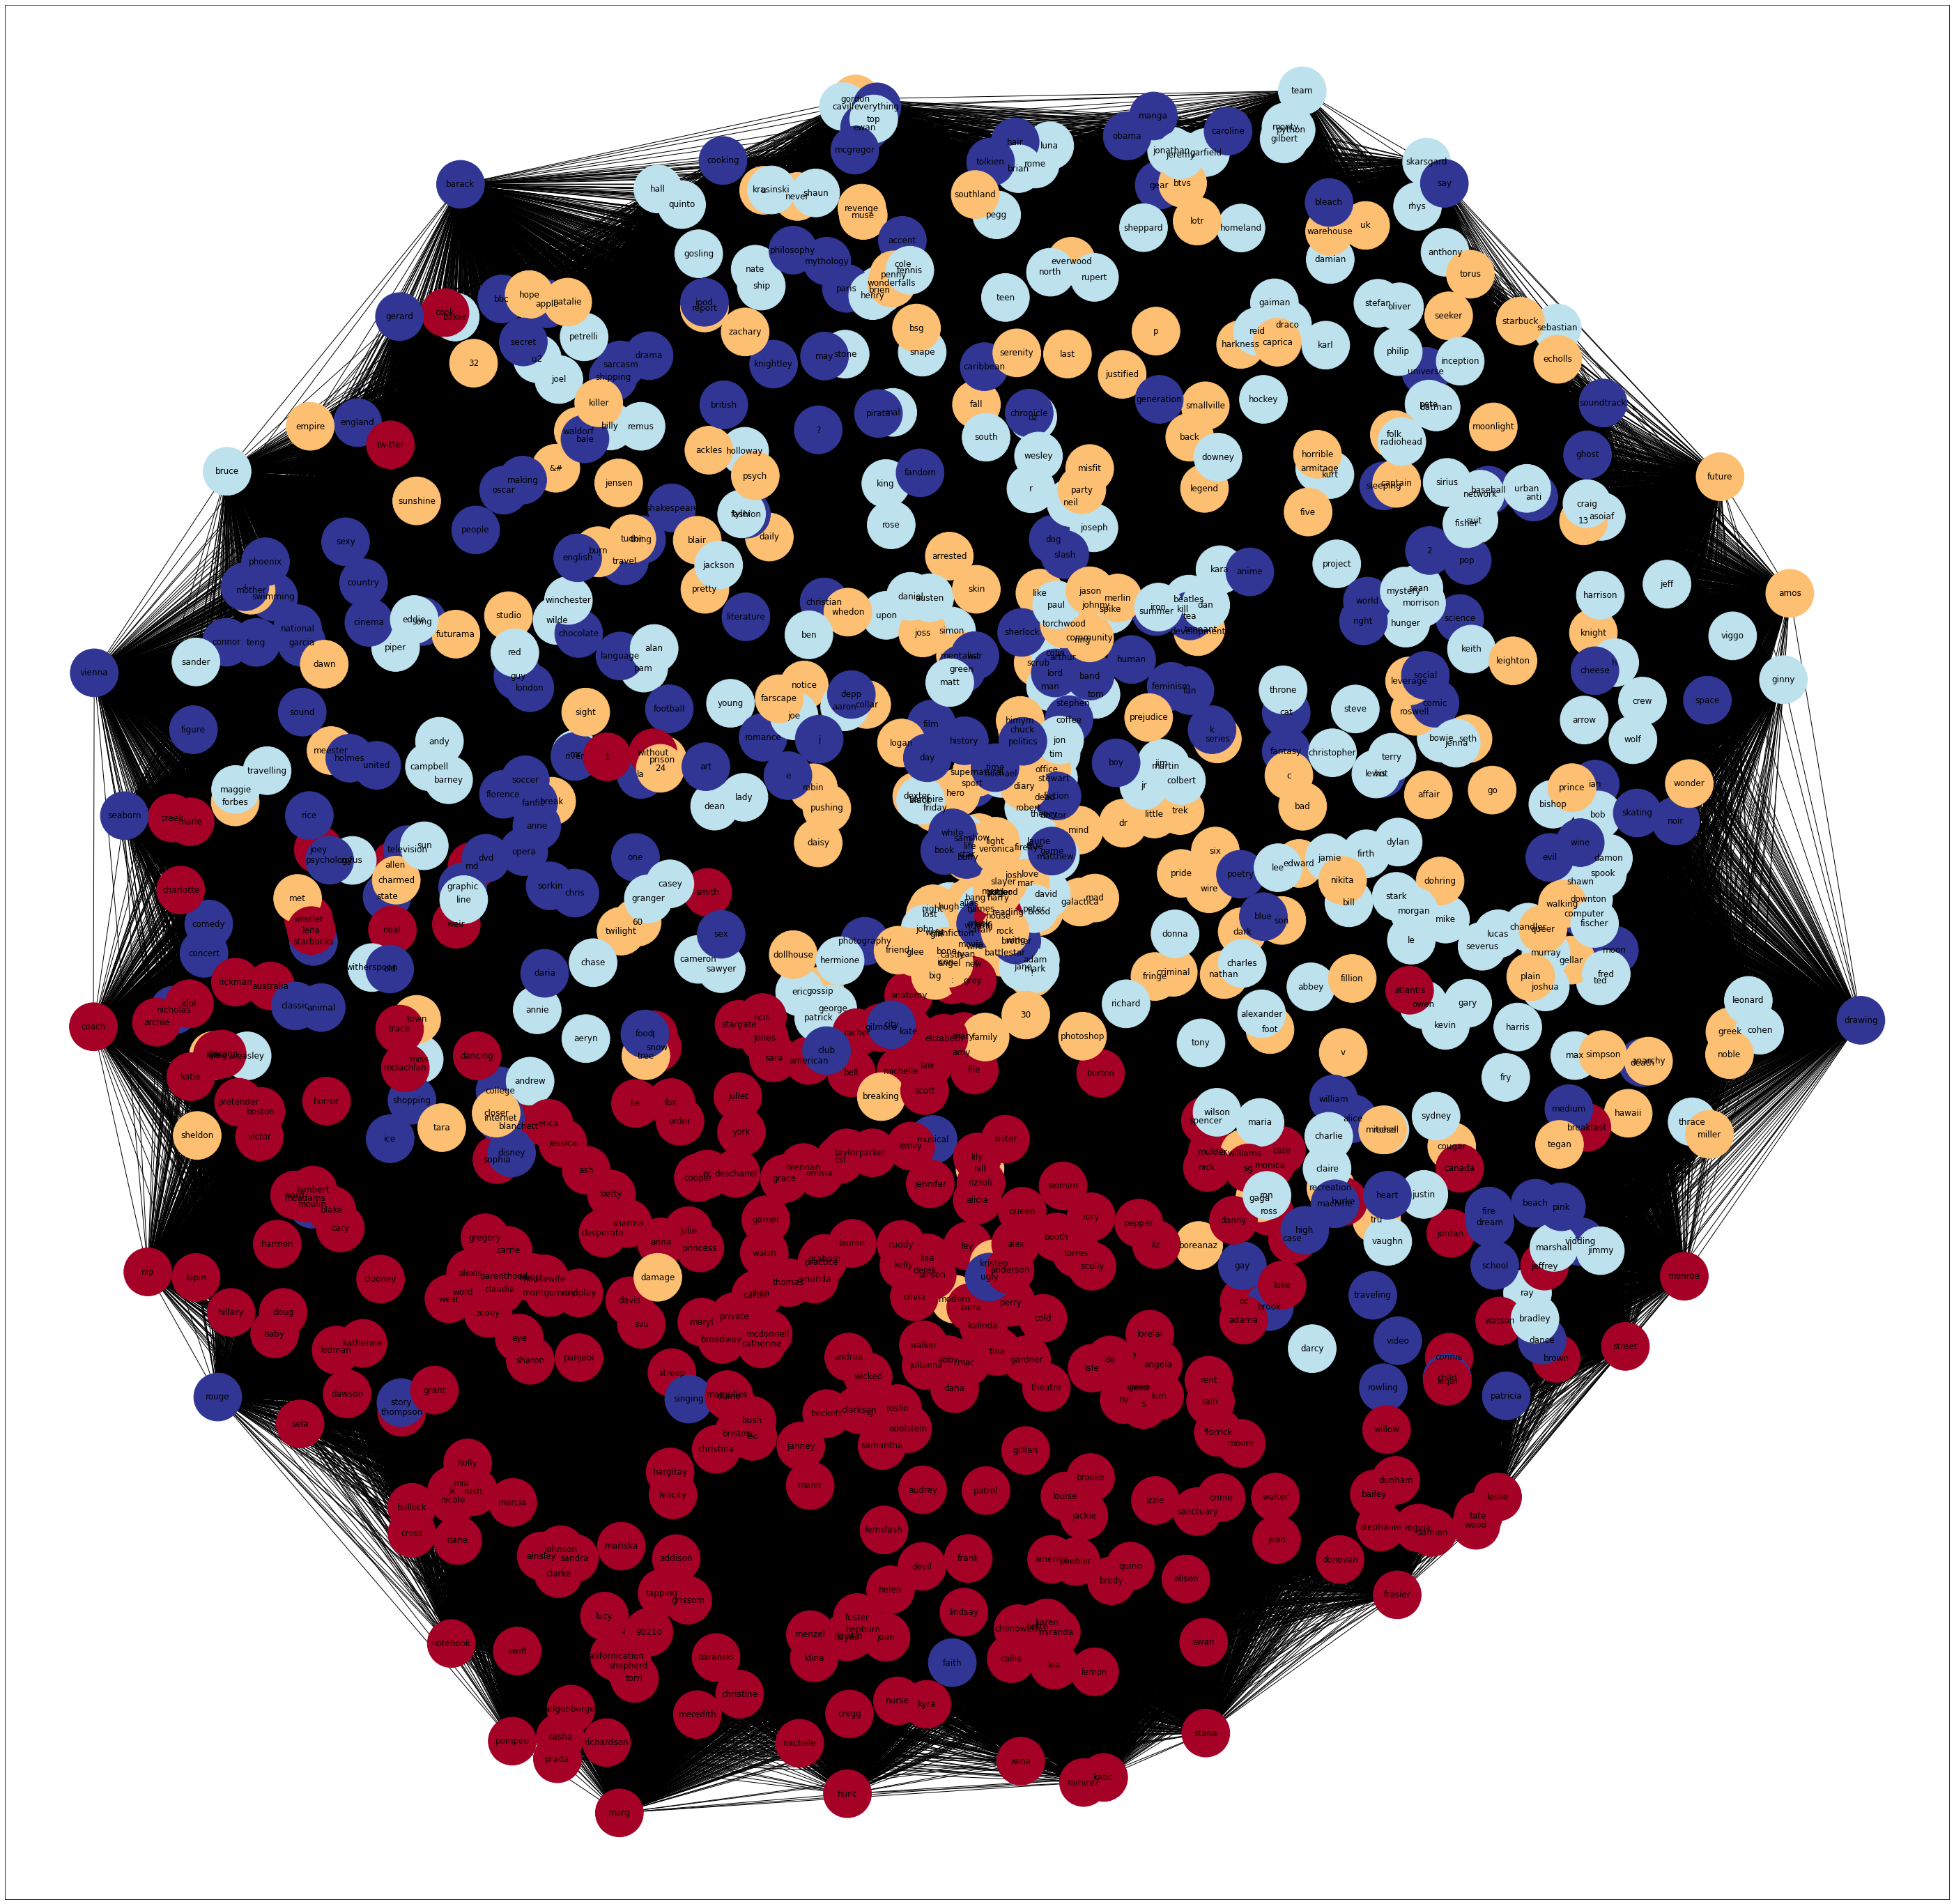

In [274]:
#  slice edges that are weighted under slice threshold
slice_threshold = 800
# weights_new = cooc[cooc >= slice_threshold]
# # this is the way to slice with single edge, i.e., if the weight of certain edge is under threshold, that edge is eiliminated. Yet the nodes at the endpoints of the edge remains
weights_new = cooc.loc[(cooc.sum(axis=1) > slice_threshold), (cooc.sum(axis=0) > slice_threshold)]
#  this is the way to slice with sum of columns and rows, i.e., if the sum of weights of certain node is under threshold, this node along with all edges incident to itself is eliminated
weights_new = weights_new.stack().to_dict()
weights_dict = {(key[0], key[1], value) for key, value in weights_new.items()}

# construct the graph
G0 = nx.Graph()
G0.add_weighted_edges_from(weights_dict)

#  do the partition modularity-based partition. 
#  It is shown there is no visible community, as the modularity is below 0.6
partition = community.best_partition(G0)
print('Modularity: {}'.format(community.modularity(partition, G0)))
nx.set_node_attributes(G0, partition, 'community')

#  draw the graph with the node color based on the different communities, and node sizes based on their weights
fig = plt.figure(figsize = (50,50))
ax = plt.subplot()
pos = nx.spring_layout(G0)
nx.draw_networkx(G0, pos = pos, nodelist = dict(G0.degree).keys(), node_size = [v*5 for v in dict(G0.degree).values()], with_labels = True, cmap = plt.cm.RdYlBu, node_color = list(partition.values()), ax = ax)

In [275]:
# save the graph
if not os.path.isdir(r'E:\OneDrive - 同济大学\03 - 阅读\network analysis\livejournal exercise'):
    os.mkdir(r'E:\OneDrive - 同济大学\03 - 阅读\network analysis\livejournal exercise')
with open('E:\\OneDrive - 同济大学\\03 - 阅读\\network analysis\\livejournal exercise\\' + DOMAIN_NAME + '.graphml', 'wb') as ofile:
    nx.write_graphml(G0, ofile)